# CCPP Dataset

In [1]:
import numpy as np
import pandas as pd
import math
from pprint import pprint
import matplotlib.pyplot as plt 
from annfuncs import *
import math


In [2]:
df=pd.read_csv("CCPP\Folds5x2_pp - Sheet1.csv") 


In [3]:
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [4]:
def normalise(df,func):
    maxes=[]
    mins=[]
    for c in df.columns:
        maxes.append(df[c].max())
        mins.append(df[c].min())
    count=0
    for c in df.columns:
        if(func=="tanh"):
            df[c]=(2*df[c]-(maxes[count]+mins[count]))/(maxes[count]-mins[count])
        elif(func=="sigmoid"):
            df[c]=(df[c]-(mins[count]))/(maxes[count]-mins[count])

        count=count+1
#     print(mins)
#     print(maxes)
    return maxes,mins

def denormalise(y,func,maxes,mins):
    if(func=="tanh"):
        ynew=(y*(maxes-mins)+(maxes+mins))/2
    elif(func=="sigmoid"):
        ynew=y*(maxes-mins)+mins
    return ynew


def r2(x,y):
    
    n=x.shape[0]
    print(n)
    sumx=np.sum(x)
    sumy=np.sum(y)
    sumxy=np.sum(np.dot(x,y))
    sumx2=np.sum(np.square(x))
    sumy2=np.sum(np.square(y))
    
    r2val=(n*sumxy-sumx*sumy)/math.sqrt((n*sumx2-sumx*sumx)*(n*sumy2-sumy*sumy))
    
#     r2val=(n*np.sum(np.dot(x,y))-*np.sum(y))/(n*np.sum(np.square(x))-np.sum(x)*np.sum(x))*(n*np.sum(np.square(y))-np.sum(y)*np.sum(y))
    return r2val*r2val
    

In [5]:
activation='tanh'

og_y=df['PE']
maxes,mins=normalise(df,activation)
y=np.array(df['PE'].values)
df.drop(['PE'], axis=1,inplace=True)

x=np.array(df.values)

In [6]:
df

,AT,V,AP,RH
0,-0.254958,-0.416370,0.543182,0.276408
1,0.324079,0.338078,0.343727,-0.101340
2,-0.813031,-0.500356,-0.046276,0.784987
3,0.079320,0.137367,-0.141302,0.369437
4,-0.489518,-0.567972,-0.191289,0.905094
...,...,...,...,...
9563,-0.159207,-0.134164,0.045286,0.754424
9564,-0.355241,-0.508185,0.523385,0.105094
9565,0.671955,0.742705,-0.008661,-0.707239
9566,0.284419,0.569039,0.037862,-0.012601


In [7]:
pprint(x)
pprint(y)


array([[-0.25495751, -0.41637011,  0.54318238,  0.27640751],
       [ 0.32407932,  0.33807829,  0.3437268 , -0.10134048],
       [-0.81303116, -0.50035587, -0.04627567,  0.7849866 ],
       ...,
       [ 0.67195467,  0.74270463, -0.00866122, -0.70723861],
       [ 0.28441926,  0.56903915,  0.03786192, -0.01260054],
       [ 0.12124646,  0.32241993,  0.20465231,  0.13431635]])
array([ 0.13907285, -0.3613245 ,  0.80927152, ..., -0.75337748,
       -0.58993377, -0.12529801])


In [8]:
len(x)

9568

In [9]:
split=int(0.9*len(x))
X1=x[0:split]
X_test=x[split:]
y1=y[0:split]
y_test=y[split:]

X_valid=[]
y_valid=[]

X_train=[]
y_train=[]
for i in range(len(X1)):
    if(i%5==0):
        X_valid.append(X1[i])
        y_valid.append(y1[i])
    else:
        X_train.append(X1[i])
        y_train.append(y1[i])

X_test=np.array(X_test)
X_valid=np.array(X_valid)
X_train=np.array(X_train)

y_test=np.array(y_test)
y_valid=np.array(y_valid)
y_train=np.array(y_train)



# X_train1, X_test, y_train1, y_test = train_test_split(x, y, test_size=0.1)
# X_train, X_valid, y_train, y_valid = train_test_split(X_train1, y_train1, test_size=0.2)

print (X_train.shape, y_train.shape)
print (X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

print(y_train)

X_train=np.transpose(X_train) 
X_valid=np.transpose(X_valid)
X_test=np.transpose(X_test) 
# y_train=np.transpose(y_train)
# y_valid=np.transpose(y_valid) 
# y_test=np.transpose(y_test) 

print(y_train.shape)

# X_train=X_train.reshape(X_train.shape[1],X_train.shape[0])
y_train=y_train.reshape(1,y_train.shape[0])
# X_valid=X_valid.reshape(X_valid.shape[1],X_valid.shape[0])
y_valid=y_valid.reshape(1,y_valid.shape[0])
# X_test=X_test.reshape(X_test.shape[1],X_test.shape[0])
y_test=y_test.reshape(1,y_test.shape[0])
# print(X_train.shape[1])
print (X_train.shape, y_train.shape)
print (X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)


(6888, 4) (6888,)
(1723, 4) (1723,)
(957, 4) (957,)
[-0.3613245   0.80927152 -0.30543046 ... -0.52264901 -0.62039735
  0.1192053 ]
(6888,)
(4, 6888) (1, 6888)
(4, 1723) (1, 1723)
(4, 957) (1, 957)


# Momentum with SGD

Cost after epoch 0: 0.037248  0.023751
Cost after epoch 1: 0.021907  0.019813
Cost after epoch 2: 0.018652  0.017144
Cost after epoch 3: 0.016317  0.015232
Cost after epoch 4: 0.014580  0.013836
Cost after epoch 5: 0.013293  0.012788
Cost after epoch 6: 0.012352  0.011982
Cost after epoch 7: 0.011629  0.011380
Cost after epoch 8: 0.011070  0.010957
Cost after epoch 9: 0.010624  0.010509
Cost after epoch 10: 0.010273  0.010381
Cost after epoch 11: 0.009987  0.009921
Cost after epoch 12: 0.009727  0.009768
Cost after epoch 13: 0.009504  0.009509
Cost after epoch 14: 0.009316  0.009321
Cost after epoch 15: 0.009142  0.009146
Cost after epoch 16: 0.008979  0.009001
Cost after epoch 17: 0.008825  0.008980
Cost after epoch 18: 0.008686  0.008721
Cost after epoch 19: 0.008556  0.008575
Cost after epoch 20: 0.008436  0.008486
Cost after epoch 21: 0.008321  0.008336
Cost after epoch 22: 0.008216  0.008281
Cost after epoch 23: 0.008121  0.008163
Cost after epoch 24: 0.008029  0.008063
Cost after

Cost after epoch 203: 0.006285  0.006288
Cost after epoch 204: 0.006284  0.006275
Cost after epoch 205: 0.006275  0.006263
Cost after epoch 206: 0.006279  0.006272
Cost after epoch 207: 0.006275  0.006294
Cost after epoch 208: 0.006271  0.006263
Cost after epoch 209: 0.006271  0.006264
Cost after epoch 210: 0.006272  0.006244
Cost after epoch 211: 0.006267  0.006378
Cost after epoch 212: 0.006266  0.006273
Cost after epoch 213: 0.006269  0.006245
Cost after epoch 214: 0.006270  0.006265
Cost after epoch 215: 0.006267  0.006263
Cost after epoch 216: 0.006263  0.006313
Cost after epoch 217: 0.006267  0.006279
Cost after epoch 218: 0.006257  0.006282
Cost after epoch 219: 0.006263  0.006276
Cost after epoch 220: 0.006263  0.006260
Cost after epoch 221: 0.006254  0.006268
Cost after epoch 222: 0.006260  0.006262
Cost after epoch 223: 0.006253  0.006258
Cost after epoch 224: 0.006255  0.006253
Cost after epoch 225: 0.006251  0.006227
Cost after epoch 226: 0.006246  0.006357
Cost after epoch

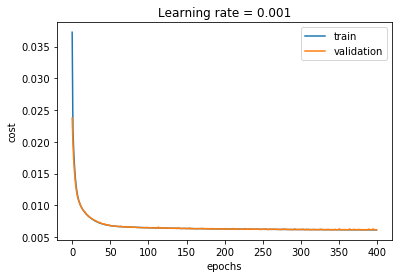

In [10]:
layers_dims = [4,10,10,1]
parameters = L_layer_model_minib(X_train, y_train,layers_dims,valid=True,valid_x=X_valid,valid_y=y_valid,num_iterations = 400,
                he_init=True, mini_batch_size = 1,learning_rate = 0.001, print_cost = True,regularisation='none',lambd=0.1,
                optimizer="momentum", beta = 0.9,beta1 = 0.9, beta2 = 0.999,epsilon = 1e-8,activation=activation,cost_func='mse')


## Corresponding MAPE values

Training mape :  0.7107204433769398
Valid mape :  0.7157541114288213
Testing mape :  0.7271898861662556
957


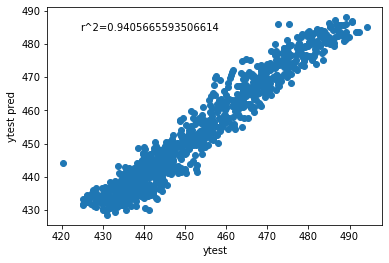

1723


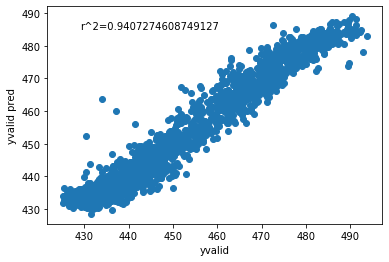

In [11]:
pred_train = predictvals(X_train, parameters,activation=activation)
predtrain_denorm=denormalise(pred_train,activation,maxes[-1],mins[-1])
ytrain_denorm=denormalise(y_train,activation,maxes[-1],mins[-1])
mapeval=mape_cost(ytrain_denorm,predtrain_denorm)
print("Training mape : ",mapeval)

pred_valid = predictvals(X_valid, parameters,activation=activation)
predvalid_denorm=denormalise(pred_valid,activation,maxes[-1],mins[-1])
yvalid_denorm=denormalise(y_valid,activation,maxes[-1],mins[-1])
mapeval=mape_cost(yvalid_denorm,predvalid_denorm)
print("Valid mape : ",mapeval)


pred_test = predictvals(X_test, parameters,activation=activation)
predtest_denorm=denormalise(pred_test,activation,maxes[-1],mins[-1])
ytest_denorm=denormalise(y_test,activation,maxes[-1],mins[-1])
mapeval=mape_cost(ytest_denorm,predtest_denorm)
print("Testing mape : ",mapeval)

# plt.scatter(ytrain_denorm,predtrain_denorm)
# plt.show()
plt.scatter(ytest_denorm[0],predtest_denorm[0])
plt.xlabel("ytest")
plt.ylabel("ytest pred")
# print(r2(ytest_denorm[0],predtest_denorm[0]))
plt.figtext(.2, .8, "r^2="+str(r2(ytest_denorm[0],predtest_denorm[0])))
plt.show()
plt.scatter(yvalid_denorm,predvalid_denorm)
plt.xlabel("yvalid")
plt.ylabel("yvalid pred")
plt.figtext(.2, .8, "r^2="+str(r2(yvalid_denorm[0],predvalid_denorm[0])))

plt.show()

# Adam with Batch/mini batch

Cost after epoch 0: 0.041161  0.012707
Cost after epoch 1: 0.010382  0.009078
Cost after epoch 2: 0.008485  0.007934
Cost after epoch 3: 0.007617  0.007467
Cost after epoch 4: 0.007155  0.007073
Cost after epoch 5: 0.006849  0.006935
Cost after epoch 6: 0.006694  0.006768
Cost after epoch 7: 0.006550  0.006619
Cost after epoch 8: 0.006458  0.006598
Cost after epoch 9: 0.006414  0.006586
Cost after epoch 10: 0.006426  0.006563
Cost after epoch 11: 0.006284  0.006400
Cost after epoch 12: 0.006268  0.006393
Cost after epoch 13: 0.006260  0.006259
Cost after epoch 14: 0.006193  0.006232
Cost after epoch 15: 0.006195  0.006211
Cost after epoch 16: 0.006139  0.006199
Cost after epoch 17: 0.006129  0.006331
Cost after epoch 18: 0.006116  0.006119
Cost after epoch 19: 0.006132  0.006101
Cost after epoch 20: 0.006114  0.006105
Cost after epoch 21: 0.006035  0.006128
Cost after epoch 22: 0.006076  0.006138
Cost after epoch 23: 0.006019  0.006213
Cost after epoch 24: 0.005991  0.006074
Cost after

Cost after epoch 203: 0.005493  0.005549
Cost after epoch 204: 0.005492  0.005573
Cost after epoch 205: 0.005456  0.005585
Cost after epoch 206: 0.005468  0.005709
Cost after epoch 207: 0.005496  0.005674
Cost after epoch 208: 0.005478  0.005552
Cost after epoch 209: 0.005517  0.005551
Cost after epoch 210: 0.005526  0.005637
Cost after epoch 211: 0.005453  0.005767
Cost after epoch 212: 0.005462  0.005581
Cost after epoch 213: 0.005480  0.005662
Cost after epoch 214: 0.005479  0.005543
Cost after epoch 215: 0.005472  0.005575
Cost after epoch 216: 0.005469  0.005670
Cost after epoch 217: 0.005486  0.005925
Cost after epoch 218: 0.005464  0.005559
Cost after epoch 219: 0.005463  0.005596
Cost after epoch 220: 0.005447  0.005540
Cost after epoch 221: 0.005429  0.005612
Cost after epoch 222: 0.005499  0.005515
Cost after epoch 223: 0.005516  0.005911
Cost after epoch 224: 0.005429  0.005550
Cost after epoch 225: 0.005465  0.005929
Cost after epoch 226: 0.005571  0.005864
Cost after epoch

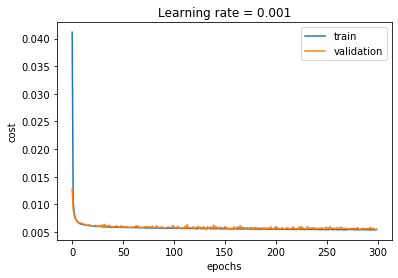

In [60]:
layers_dims = [4,20,20,1]
parameters = L_layer_model_minib(X_train, y_train,layers_dims,valid=True,valid_x=X_valid,valid_y=y_valid,num_iterations = 300,
                he_init=True, mini_batch_size = 64,learning_rate = 0.001, print_cost = True,regularisation='none',lambd=0.1,
                optimizer="adam", beta = 0.9,beta1 = 0.9, beta2 = 0.999,epsilon = 1e-8,activation=activation,cost_func='mse')

In [62]:
parameters

{'W1': array([[ 1.32146254,  0.17700244, -0.05596077, -0.8378489 ],
        [ 0.03545396, -0.21034651,  0.0634636 , -0.48799232],
        [-0.39500023, -0.11564776, -0.99595619,  0.41198287],
        [ 0.21261521,  1.2645012 ,  0.36320829, -0.29215493],
        [-0.94226479, -0.91425557,  0.27963053, -1.13047057],
        [-1.0282027 ,  0.05795736,  0.71847369, -0.08533043],
        [-0.79334844, -0.73763745,  0.4641026 , -0.26722388],
        [-0.10586291, -0.24897335,  0.8392219 ,  1.28951155],
        [-0.6863736 , -0.51114118, -1.11815892, -1.53257043],
        [-0.32499222, -1.01406392,  1.18349022, -0.00503761],
        [-1.1538902 ,  0.77336965, -0.75076245, -1.20294001],
        [-0.77292885, -0.55454635, -0.45657186, -0.10280697],
        [-1.55836986,  0.2023441 ,  0.19798028,  0.78793282],
        [ 0.72154343,  0.47707768,  1.16546199, -0.79206626],
        [ 0.59984123, -1.28328895, -0.48860543, -1.24306278],
        [ 0.54973732,  1.13529634,  0.2907278 ,  1.01164004],
  

In [63]:
import pickle 
  
# opening file in write mode (binary) 
file = open("parameter.txt", "wb") 
# serializing dictionary  
pickle.dump(parameters, file) 
  
# closing the file 
file.close() 
 

Data type before reconstruction :  <class 'bytes'>
Data type after reconstruction :  <class 'dict'>
{'W1': array([[ 1.32146254,  0.17700244, -0.05596077, -0.8378489 ],
       [ 0.03545396, -0.21034651,  0.0634636 , -0.48799232],
       [-0.39500023, -0.11564776, -0.99595619,  0.41198287],
       [ 0.21261521,  1.2645012 ,  0.36320829, -0.29215493],
       [-0.94226479, -0.91425557,  0.27963053, -1.13047057],
       [-1.0282027 ,  0.05795736,  0.71847369, -0.08533043],
       [-0.79334844, -0.73763745,  0.4641026 , -0.26722388],
       [-0.10586291, -0.24897335,  0.8392219 ,  1.28951155],
       [-0.6863736 , -0.51114118, -1.11815892, -1.53257043],
       [-0.32499222, -1.01406392,  1.18349022, -0.00503761],
       [-1.1538902 ,  0.77336965, -0.75076245, -1.20294001],
       [-0.77292885, -0.55454635, -0.45657186, -0.10280697],
       [-1.55836986,  0.2023441 ,  0.19798028,  0.78793282],
       [ 0.72154343,  0.47707768,  1.16546199, -0.79206626],
       [ 0.59984123, -1.28328895, -0.48

In [64]:
# reading the data from the file 
with open('parameter.txt', 'rb') as handle: 
    data = handle.read() 
  
print("Data type before reconstruction : ", type(data)) 
  
# reconstructing the data as dictionary 
parameters= pickle.loads(data) 
  
print("Data type after reconstruction : ", type(parameters)) 
print(parameters) 

{'W1': array([[ 1.32146254,  0.17700244, -0.05596077, -0.8378489 ],
        [ 0.03545396, -0.21034651,  0.0634636 , -0.48799232],
        [-0.39500023, -0.11564776, -0.99595619,  0.41198287],
        [ 0.21261521,  1.2645012 ,  0.36320829, -0.29215493],
        [-0.94226479, -0.91425557,  0.27963053, -1.13047057],
        [-1.0282027 ,  0.05795736,  0.71847369, -0.08533043],
        [-0.79334844, -0.73763745,  0.4641026 , -0.26722388],
        [-0.10586291, -0.24897335,  0.8392219 ,  1.28951155],
        [-0.6863736 , -0.51114118, -1.11815892, -1.53257043],
        [-0.32499222, -1.01406392,  1.18349022, -0.00503761],
        [-1.1538902 ,  0.77336965, -0.75076245, -1.20294001],
        [-0.77292885, -0.55454635, -0.45657186, -0.10280697],
        [-1.55836986,  0.2023441 ,  0.19798028,  0.78793282],
        [ 0.72154343,  0.47707768,  1.16546199, -0.79206626],
        [ 0.59984123, -1.28328895, -0.48860543, -1.24306278],
        [ 0.54973732,  1.13529634,  0.2907278 ,  1.01164004],
  

# Corresponding MAPE values

Training mape :  0.6552409400797429
Valid mape :  0.6688540464907443
Testing mape :  0.6783104901023306
957


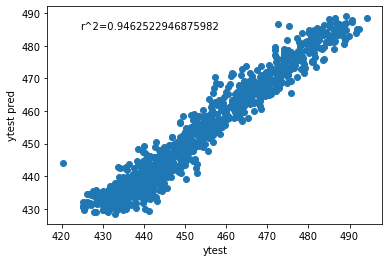

1723


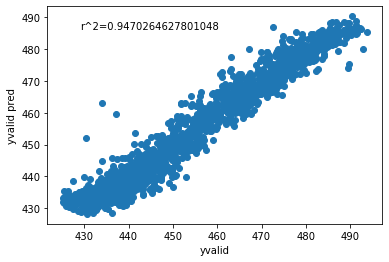

In [65]:
pred_train = predictvals(X_train, parameters,activation=activation)
predtrain_denorm=denormalise(pred_train,activation,maxes[-1],mins[-1])
ytrain_denorm=denormalise(y_train,activation,maxes[-1],mins[-1])
mapeval=mape_cost(ytrain_denorm,predtrain_denorm)
print("Training mape : ",mapeval)

pred_valid = predictvals(X_valid, parameters,activation=activation)
predvalid_denorm=denormalise(pred_valid,activation,maxes[-1],mins[-1])
yvalid_denorm=denormalise(y_valid,activation,maxes[-1],mins[-1])
mapeval=mape_cost(yvalid_denorm,predvalid_denorm)
print("Valid mape : ",mapeval)


pred_test = predictvals(X_test, parameters,activation=activation)
predtest_denorm=denormalise(pred_test,activation,maxes[-1],mins[-1])
ytest_denorm=denormalise(y_test,activation,maxes[-1],mins[-1])
mapeval=mape_cost(ytest_denorm,predtest_denorm)
print("Testing mape : ",mapeval)

# plt.scatter(ytrain_denorm,predtrain_denorm)
# plt.show()
plt.scatter(ytest_denorm[0],predtest_denorm[0])
plt.xlabel("ytest")
plt.ylabel("ytest pred")
# print(r2(ytest_denorm[0],predtest_denorm[0]))
plt.figtext(.2, .8, "r^2="+str(r2(ytest_denorm[0],predtest_denorm[0])))
plt.show()
plt.scatter(yvalid_denorm,predvalid_denorm)
plt.xlabel("yvalid")
plt.ylabel("yvalid pred")
plt.figtext(.2, .8, "r^2="+str(r2(yvalid_denorm[0],predvalid_denorm[0])))

plt.show()